# **Part B**

In [ ]:
#import the libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, applications
from sklearn.metrics import f1_score

In [ ]:
# #dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3)

You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

In [ ]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

datagen.fit(X_train)

batch_size = 10
augmented_data_generator = datagen.flow(X_train, Y_train, batch_size=batch_size)

Use Visualization libraries to see how data augmentation works.

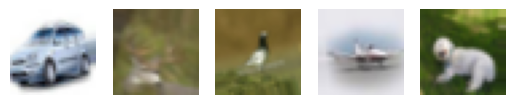

In [ ]:
def visualize_augmented_images(generator, num_images=5):
    for X_batch, _ in generator:
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(X_batch[i].astype('uint8'))
            plt.axis('off')
        plt.show()
        break

visualize_augmented_images(datagen.flow(X_train, Y_train, batch_size=5), num_images=5)


Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

In [ ]:
def simple_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
def transfer_learning_model(input_shape, num_classes):
    base_model = applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
input_shape = X_train.shape[1:]
num_classes = 10

simple_cnn_model = simple_cnn(input_shape, num_classes)
simple_cnn_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
simple_cnn_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

transfer_learning_model = transfer_learning_model(input_shape, num_classes)
transfer_learning_model.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])
transfer_learning_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
1094/1094 [==============================] - 49s 44ms/step - loss: 1.9393 - accuracy: 0.3240
Epoch 2/10
1094/1094 [==============================] - 47s 43ms/step - loss: 1.4958 - accuracy: 0.4666
Epoch 3/10
1094/1094 [==============================] - 45s 41ms/step - loss: 1.3189 - accuracy: 0.5313
Epoch 4/10
1094/1094 [==============================] - 45s 41ms/step - loss: 1.2038 - accuracy: 0.5771
Epoch 5/10
1094/1094 [==============================] - 43s 40ms/step - loss: 1.1210 - accuracy: 0.6069
Epoch 6/10
1094/1094 [==============================] - 45s 41ms/step - loss: 1.0491 - accuracy: 0.6344
Epoch 7/10
1094/1094 [==============================] - 49s 45ms/step - loss: 0.9667 - accuracy: 0.6641
Epoch 8/10
1094/1094 [==============================] - 44s 40ms/step - loss: 0.8997 - accuracy: 0.6859
Epoch 9/10
1094/1094 [==============================] - 46s 42ms/step - loss: 0.8414 - accuracy: 0.7071
Epoch 10/10
1094/1094 [==============================] - 44s 41m

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
1094/1094 [==============================] - 42s 34ms/step - loss: 2.1513 - accuracy: 0.2025
Epoch 2/10
1094/1094 [==============================] - 39s 36ms/step - loss: 2.0995 - accuracy: 0.2258
Epoch 3/10
1094/1094 [==============================] - 38s 35ms/step - loss: 2.0857 - accuracy: 0.2274
Epoch 4/10
1094/1094 [==============================] - 39s 35ms/step - loss: 2.0767 - accuracy: 0.2334
Epoch 5/10
1094/1094 [==============================] - 38s 34ms/step - loss: 2.0708 - accuracy: 0.2374
Epoch 6/10
1094/1094 [==============================] - 38s 35ms/step - loss: 2.0643 - accuracy: 0.2397
Epoch 7/10
1094/1094 [==============================] - 38s 35ms/step - loss: 2.0616 - accuracy: 0.2390
Epoch 8/10
1094/1094 [==============================] - 38s 35ms/step - loss: 2.0552 - accuracy: 0.2425
Epoch 9/10
1094/1094 [==============================] - 39s 36ms/step - loss: 2.0500 - accuracy: 0.2436
E

In [ ]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    weighted_f1 = f1_score(Y_test, Y_pred, average='weighted')
    return weighted_f1

In [ ]:
weighted_f1_sc = evaluate_model(simple_cnn_model, X_test, Y_test)
weighted_f1_tl = evaluate_model(transfer_learning_model, X_test, Y_test)

313/313 [==============================] - 10s 32ms/step


In [ ]:
print("Weighted F1 Score - Simple CNN:", weighted_f1_sc)
print("Weighted F1 Score - Transfer Learning:", weighted_f1_tl)


Weighted F1 Score - Simple CNN: 0.6215532838781681
Weighted F1 Score - Transfer Learning: 0.22434309996535823
